<style>
body {
    max-width: 900px;
    margin: 40px auto;
    padding: 0 20px;
    font-family: "Georgia", serif;
    line-height: 1.6;
}
</style>

<div style="text-align: center; padding: 60px 60px">
  <h1 style="font-weight: bold; font-size: 3.1em">
    GA-UFLP-1
  </h1>
</div>

En esta Notebook se hace una pequeña busqueda de los parámetros que se utilizarán, ademas de mostrar el funcionamiento de las funciones.

## **CONFIGURACIÓN DE LA NOTEBOOK**

In [1]:
import pandas as pd
import os

In [2]:
from cargar_datos import *
from ga2 import *

# **CARGAR DATOS**

In [3]:
file_name = 'UFLP-10'

In [4]:
n_instalaciones, n_clientes, costos_fijos, costos_de_transporte = cargar_datos('datos/'+file_name+'.txt')

# **BÚSQUEDA DE HIPERPARÁMETROS**

# **BÚSQUEDA DE MUTACIÓN**

In [5]:
random_seed = [2, 3, 5, 7, 11, 13, 17, 19, 23]
fitness_objetivo = 257896

path = "resultados-hp"
os.makedirs(os.path.join(path, file_name), exist_ok=True)

In [6]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .2,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .4,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .6,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .8,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
]

## **EJECUCIÓN**

In [7]:
def ejecucion(configuraciones=configuraciones, random_seed=random_seed, fitness_objetivo=fitness_objetivo):
    resultados = {}

    for config in configuraciones:
        nombre_configuracion = f"N={config['tamaño_de_poblacion']}, M={config['tasa_de_mutacion']}, C={config['tasa_de_crossover']}, T={config['tamaño_del_torneo']}, G={config['maximo_de_generaciones']}, tc={config['tipo_de_crossover']}, tm={config['tipo_de_mutacion']}"
        print(f"--- Ejecutando configuracion: {nombre_configuracion} ---")
        resultados[nombre_configuracion] = []

        for ejecucion in range(len(random_seed)):
            ga = UFLP_GA(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte,
                        config["tamaño_de_poblacion"], config["tasa_de_mutacion"], config["tasa_de_crossover"],
                        config["tamaño_del_torneo"], config["maximo_de_generaciones"], config["tipo_de_crossover"],
                        config["tipo_de_mutacion"], random_seed[ejecucion], fitness_objetivo)

            mejor_solucion, mejor_fitness, historial_de_fitnesses, tiempo_de_ejecucion, num_generaciones, generacion_opti = ga.run()
            resultados[nombre_configuracion].append({
                "mejor_solucion": mejor_solucion,
                "mejor_costo": mejor_fitness,
                "tiempo_de_ejecucion": tiempo_de_ejecucion,
                "num_generaciones": num_generaciones,
                "historial_de_fitnesses": historial_de_fitnesses,
                "generacion_optima": generacion_opti
            })
            print(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}")

            with open(os.path.join(path, file_name, f"{nombre_configuracion}.txt"), "a") as f:
                f.write(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}\n")
       
        print("\n")
        
    return resultados

In [8]:
resultados = ejecucion()

--- Ejecutando configuracion: N=100, M=0.2, C=0, T=10, G=300, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 258505, Tiempo = 0.86673s, Generación Óptima = None
Seed 3: Mejor Costo = 258208, Tiempo = 0.42635s, Generación Óptima = None
Seed 5: Mejor Costo = 258382, Tiempo = 0.48740s, Generación Óptima = None
Seed 7: Mejor Costo = 258393, Tiempo = 0.43420s, Generación Óptima = None
Seed 11: Mejor Costo = 258222, Tiempo = 0.42710s, Generación Óptima = None
Seed 13: Mejor Costo = 258026, Tiempo = 0.43249s, Generación Óptima = None
Seed 17: Mejor Costo = 258246, Tiempo = 0.42785s, Generación Óptima = None
Seed 19: Mejor Costo = 258402, Tiempo = 0.42917s, Generación Óptima = None
Seed 23: Mejor Costo = 258191, Tiempo = 0.41896s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=0.4, C=0, T=10, G=300, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 258101, Tiempo = 0.42269s, Generación Óptima = None
Seed 3: Mejor Costo = 258081, Tiempo = 0.41994s, Generación Óptima = None
S

## **RESUMEN**

In [9]:
from graficas import *

In [10]:
tablas_resumen = resumen(resultados, fitness_objetivo, random_seed, path, file_name)

## **GRÁFICAS**

In [11]:
curva_corvengencia_individual(resultados, path, file_name)
box_plot_costos(resultados, path, file_name)
guardar_resultados(resultados, path, file_name, random_seed)

Texto guardado en resultados-hp\UFLP-10\N=100, M=0.2, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados-hp\UFLP-10\N=100, M=0.4, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados-hp\UFLP-10\N=100, M=0.6, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados-hp\UFLP-10\N=100, M=0.8, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados-hp\UFLP-10\N=100, M=1, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt


## **COMPARACIÓN**

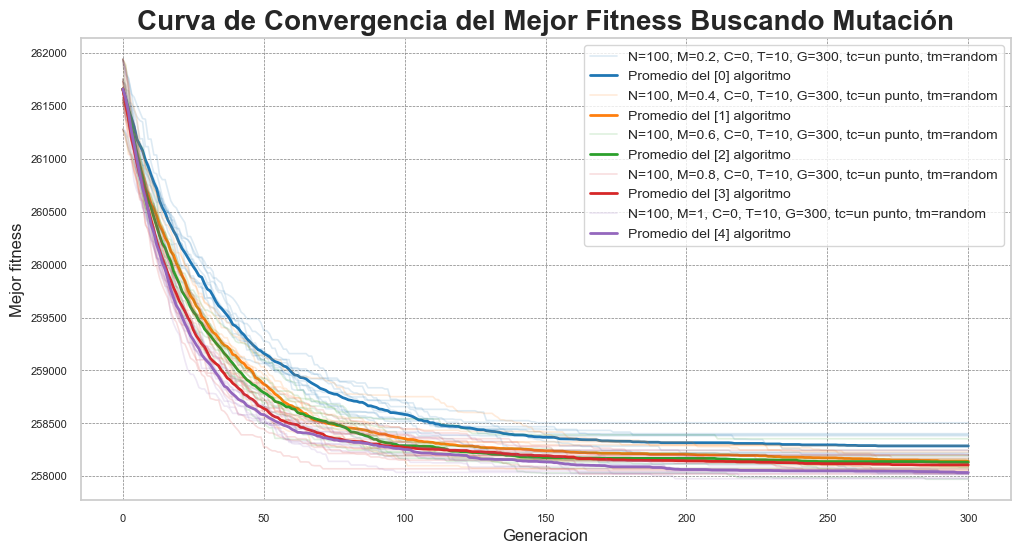

In [12]:
curva_convergencia_comparacion(resultados, path, file_name, show=True, alphaa=0.15, NOMBRE="Buscando Mutación")

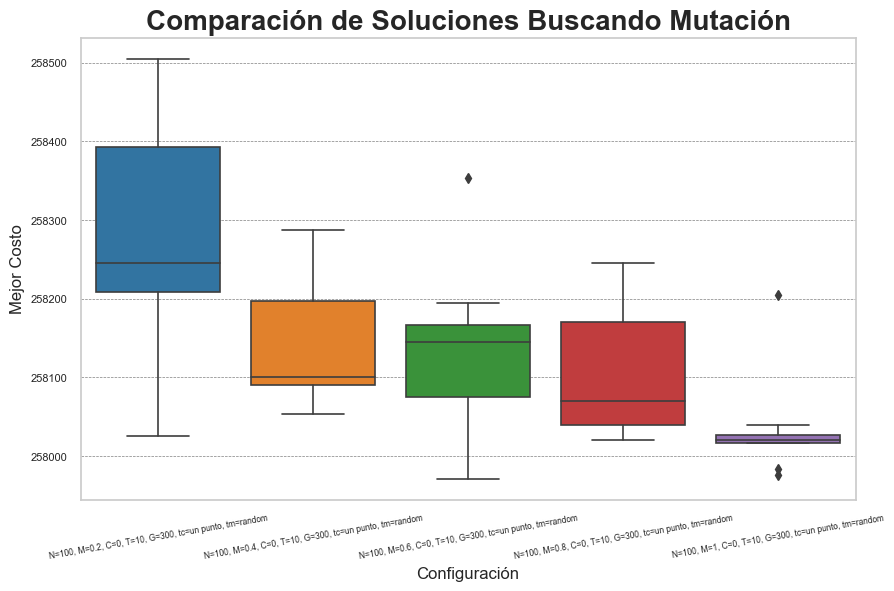

In [13]:
box_plot_costos_comparacion(resultados, path, file_name, show=True, NOMBRE="Buscando Mutación")

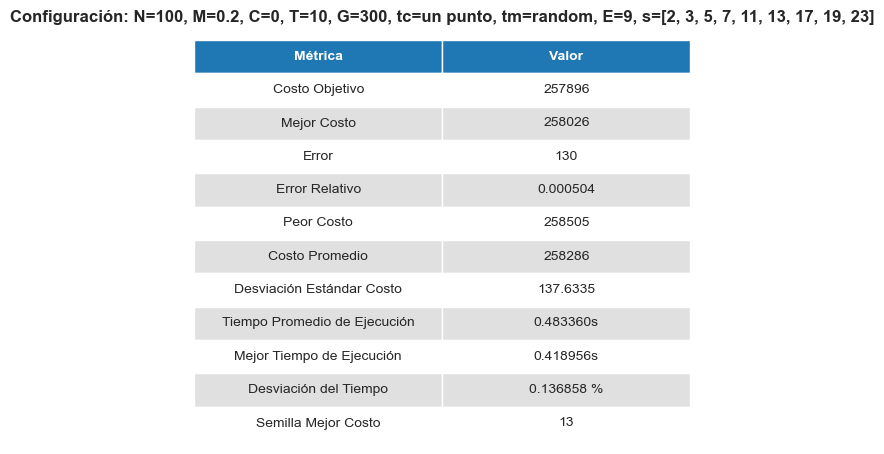

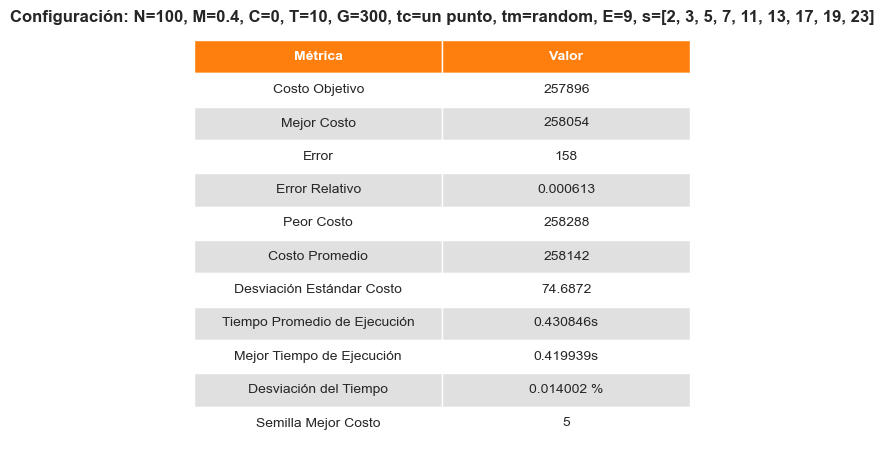

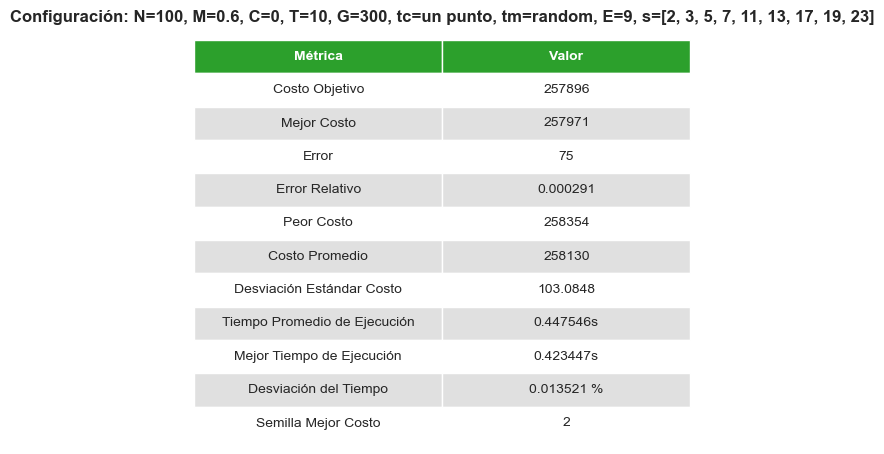

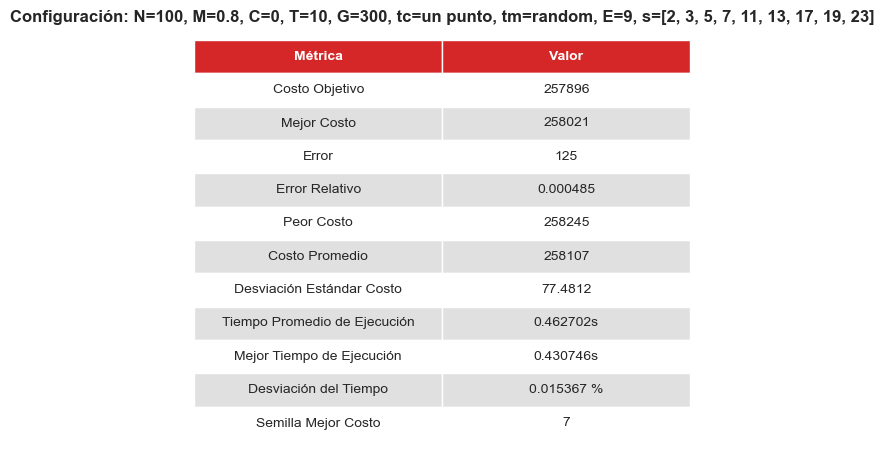

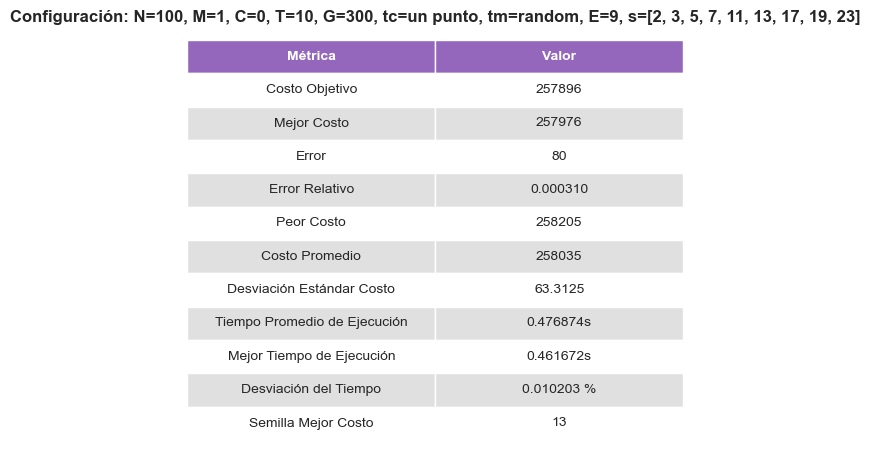

In [14]:
resumen_tablas(resultados, path, file_name, len(random_seed), tablas_resumen, random_seed, show=True, NOMBRE="Buscando Mutación")

# **BÚSQUEDA DE CROSSOVER**

In [15]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.2,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.4,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.6,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto", 
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 1,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

In [16]:
def todo(quebuscamos):
    resultados = ejecucion(configuraciones=configuraciones, random_seed=random_seed, fitness_objetivo=fitness_objetivo)
    tablas_resumen = resumen(resultados=resultados, fitness_objetivo=fitness_objetivo, path=path, file_name=file_name, random_seed=random_seed)
    curva_corvengencia_individual(resultados, path, file_name)
    box_plot_costos(resultados, path, file_name)
    guardar_resultados(resultados, path, file_name, random_seed)
    curva_convergencia_comparacion(resultados, path, file_name, show=True, alphaa=0.15, NOMBRE=quebuscamos)
    box_plot_costos_comparacion(resultados, path, file_name, show=True, NOMBRE=quebuscamos)
    resumen_tablas(resultados, path, file_name, len(random_seed), tablas_resumen, random_seed, show=True, NOMBRE=quebuscamos)

--- Ejecutando configuracion: N=100, M=1, C=0, T=10, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 259019, Tiempo = 0.04647s, Generación Óptima = None
Seed 3: Mejor Costo = 259105, Tiempo = 0.06399s, Generación Óptima = None
Seed 5: Mejor Costo = 259096, Tiempo = 0.05653s, Generación Óptima = None
Seed 7: Mejor Costo = 259106, Tiempo = 0.05806s, Generación Óptima = None
Seed 11: Mejor Costo = 259148, Tiempo = 0.05203s, Generación Óptima = None
Seed 13: Mejor Costo = 259054, Tiempo = 0.04011s, Generación Óptima = None
Seed 17: Mejor Costo = 258782, Tiempo = 0.06893s, Generación Óptima = None
Seed 19: Mejor Costo = 259209, Tiempo = 0.05246s, Generación Óptima = None
Seed 23: Mejor Costo = 259228, Tiempo = 0.06049s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.2, T=10, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 259173, Tiempo = 0.05571s, Generación Óptima = None
Seed 3: Mejor Costo = 258792, Tiempo = 0.04658s, Generación Óptima = None
Seed 

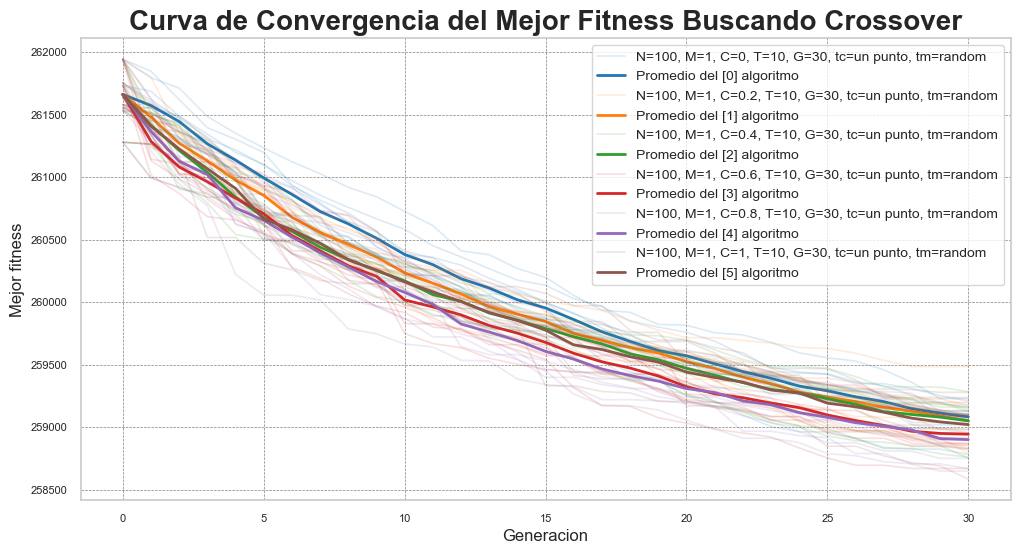

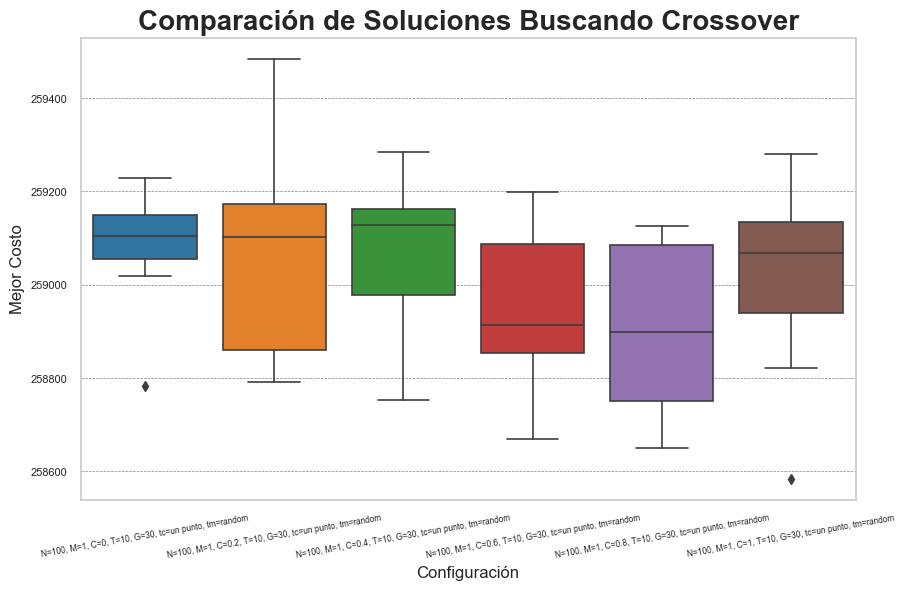

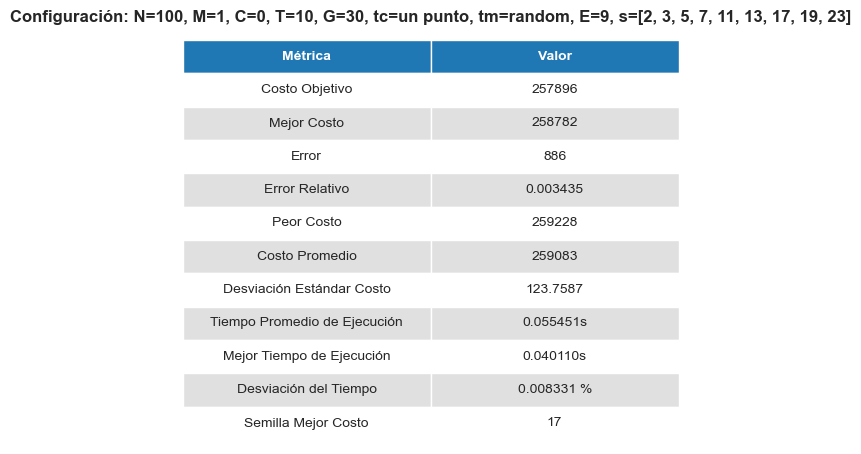

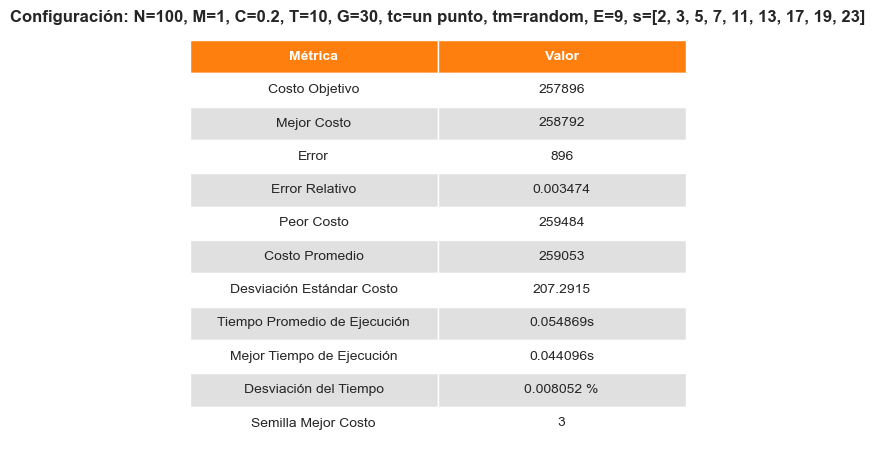

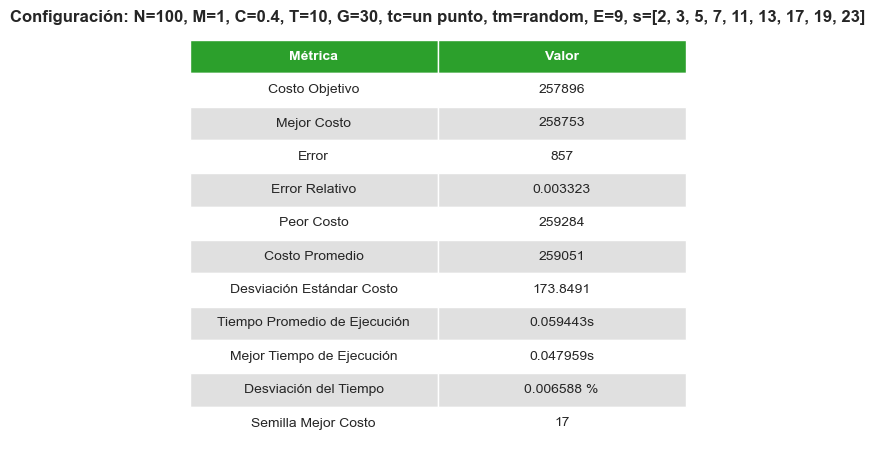

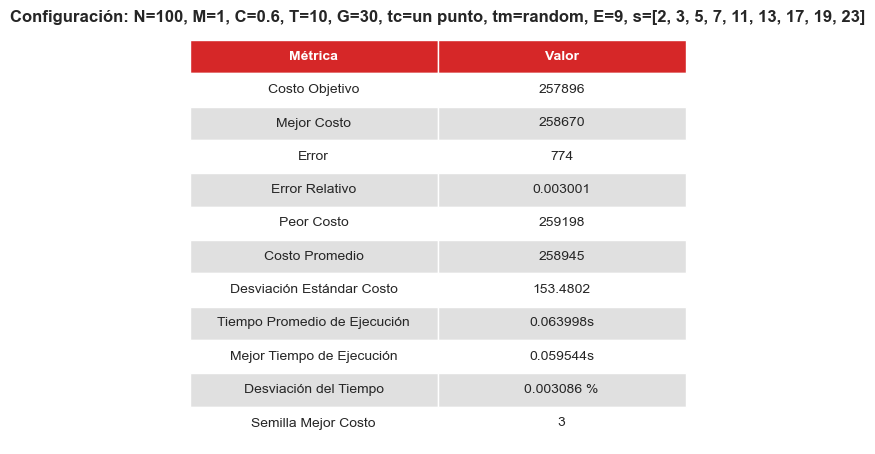

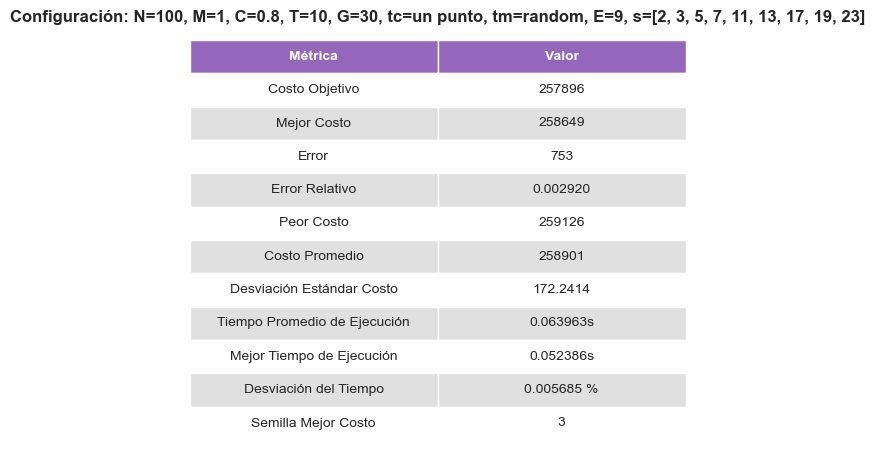

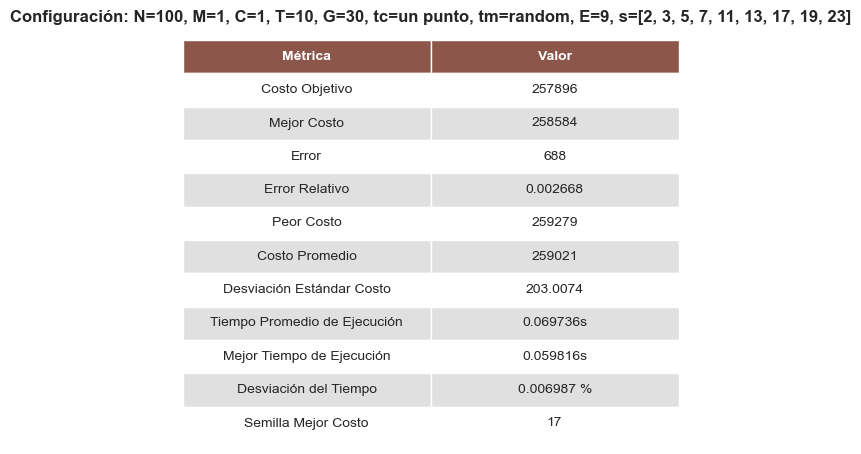

In [17]:
todo("Buscando Crossover")

# **BÚSQUEDA DE TORNEO**

In [18]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 2,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 20,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 30,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 50,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 60,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=2, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 260380, Tiempo = 0.06617s, Generación Óptima = None
Seed 3: Mejor Costo = 259764, Tiempo = 0.06472s, Generación Óptima = None
Seed 5: Mejor Costo = 260113, Tiempo = 0.06744s, Generación Óptima = None
Seed 7: Mejor Costo = 260379, Tiempo = 0.06597s, Generación Óptima = None
Seed 11: Mejor Costo = 260168, Tiempo = 0.06574s, Generación Óptima = None
Seed 13: Mejor Costo = 259967, Tiempo = 0.06282s, Generación Óptima = None
Seed 17: Mejor Costo = 260124, Tiempo = 0.06967s, Generación Óptima = None
Seed 19: Mejor Costo = 260159, Tiempo = 0.06109s, Generación Óptima = None
Seed 23: Mejor Costo = 260277, Tiempo = 0.06599s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=10, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 258751, Tiempo = 0.06346s, Generación Óptima = None
Seed 3: Mejor Costo = 258649, Tiempo = 0.07441s, Generación Óptima = None
Seed

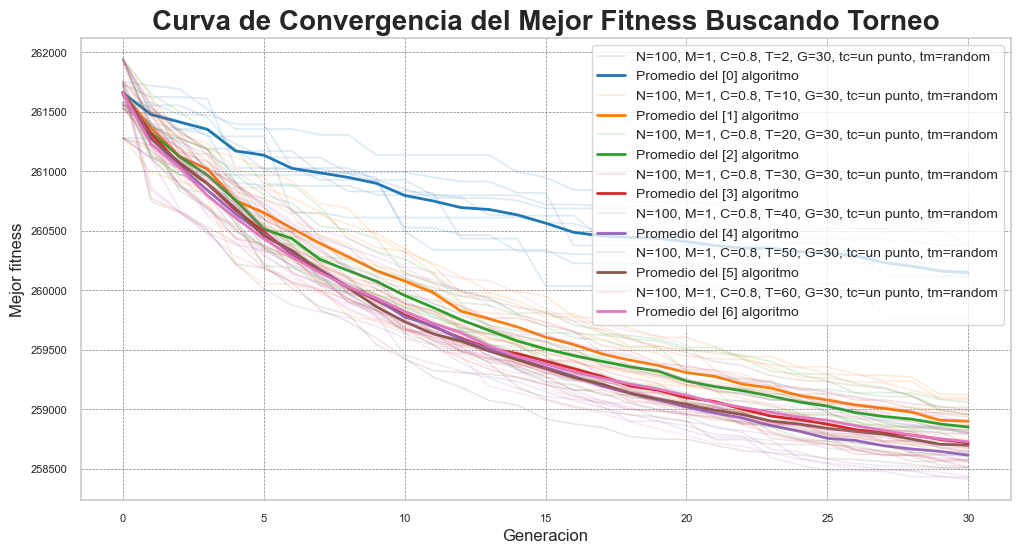

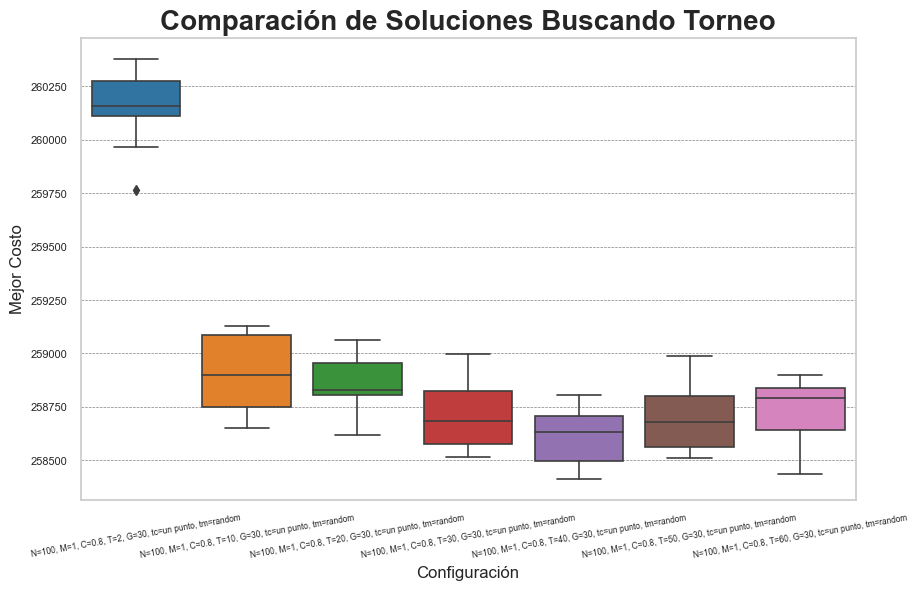

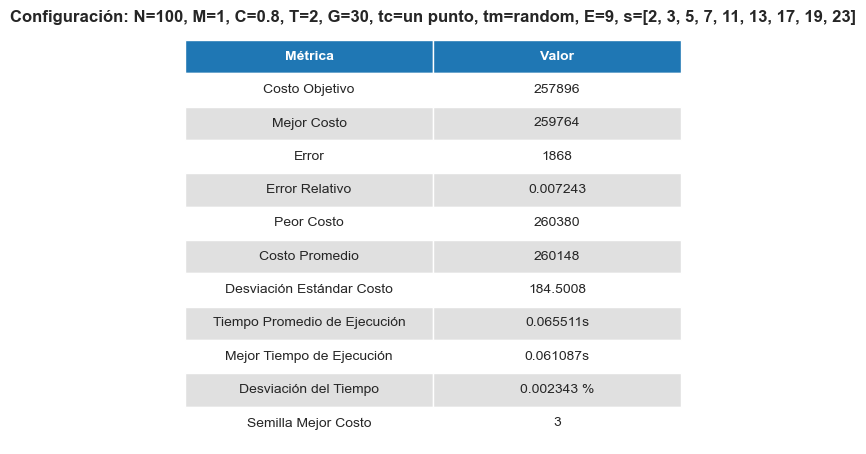

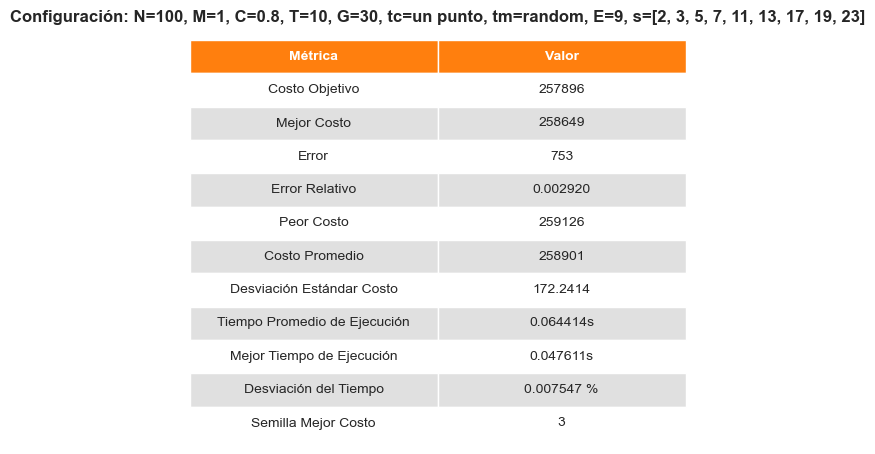

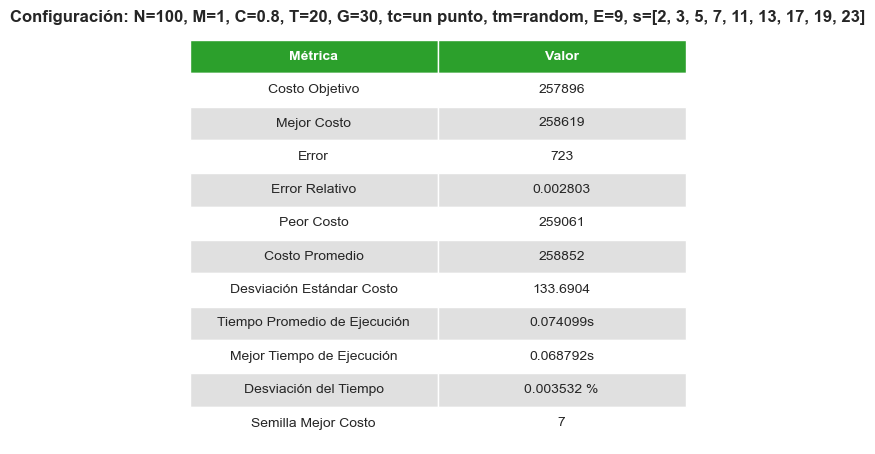

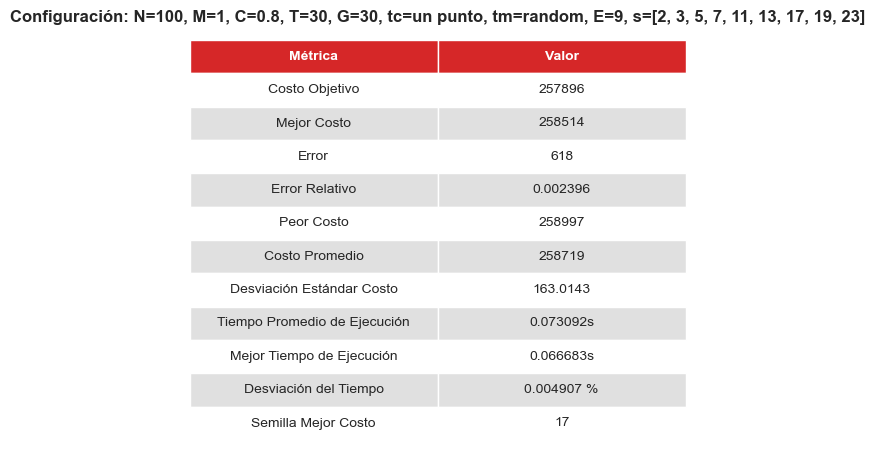

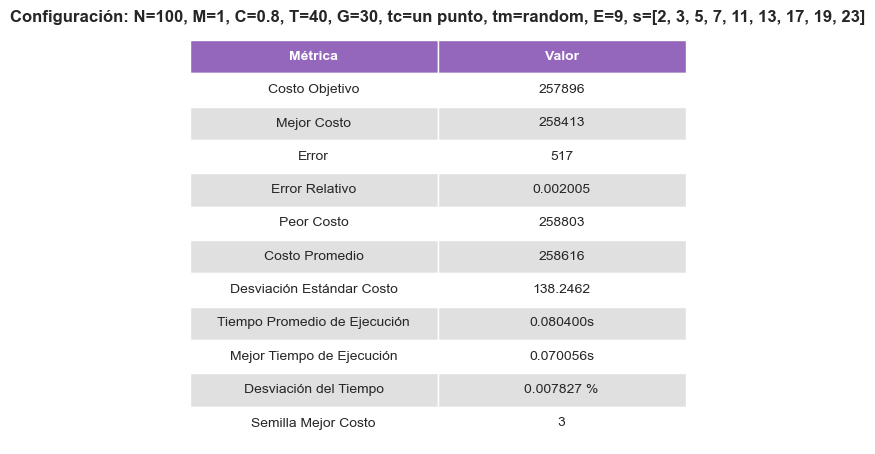

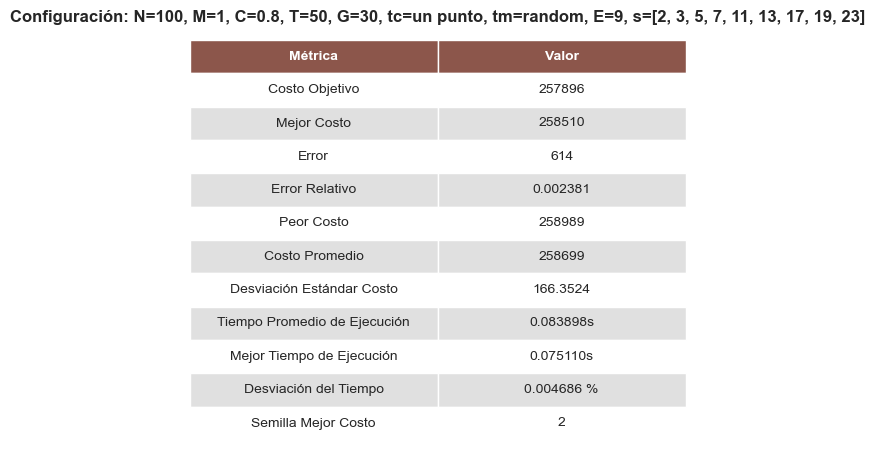

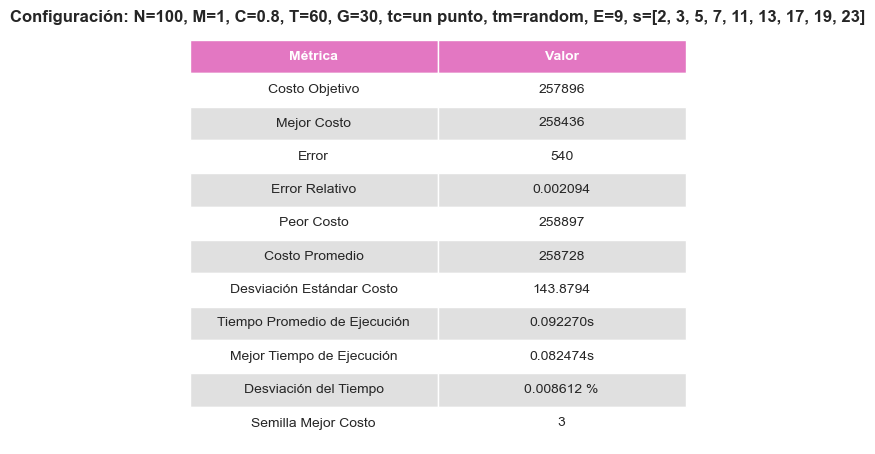

In [19]:
todo("Buscando Torneo")

# **BÚSQUEDA DE TIPO DE CROSSOVER**

In [20]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "uniforme",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 258695, Tiempo = 0.06712s, Generación Óptima = None
Seed 3: Mejor Costo = 258413, Tiempo = 0.08936s, Generación Óptima = None
Seed 5: Mejor Costo = 258579, Tiempo = 0.07726s, Generación Óptima = None
Seed 7: Mejor Costo = 258633, Tiempo = 0.06574s, Generación Óptima = None
Seed 11: Mejor Costo = 258708, Tiempo = 0.06272s, Generación Óptima = None
Seed 13: Mejor Costo = 258803, Tiempo = 0.07037s, Generación Óptima = None
Seed 17: Mejor Costo = 258428, Tiempo = 0.07529s, Generación Óptima = None
Seed 19: Mejor Costo = 258787, Tiempo = 0.08766s, Generación Óptima = None
Seed 23: Mejor Costo = 258494, Tiempo = 0.08874s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=uniforme, tm=random ---
Seed 2: Mejor Costo = 259147, Tiempo = 0.08026s, Generación Óptima = None
Seed 3: Mejor Costo = 259390, Tiempo = 0.06915s, Generación Óptima = None
See

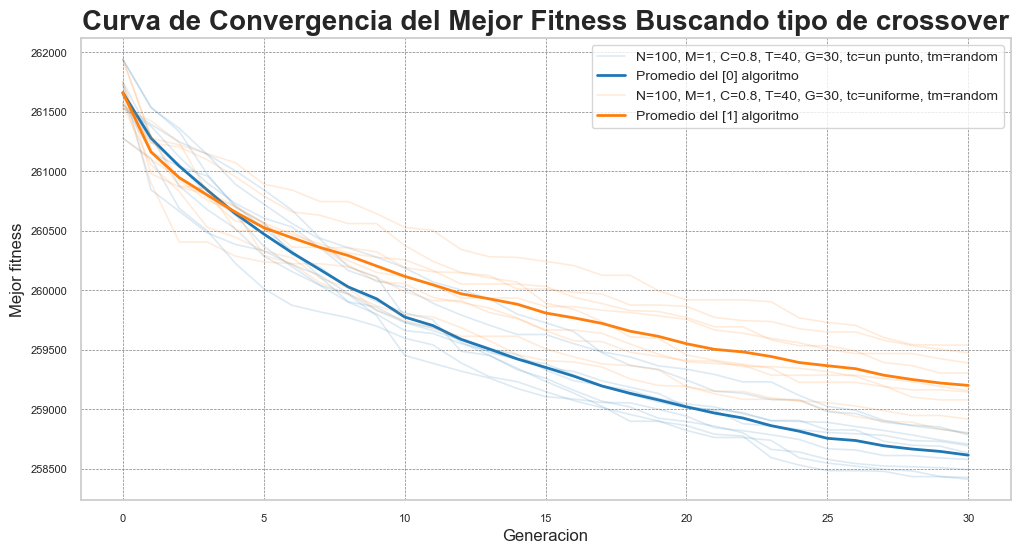

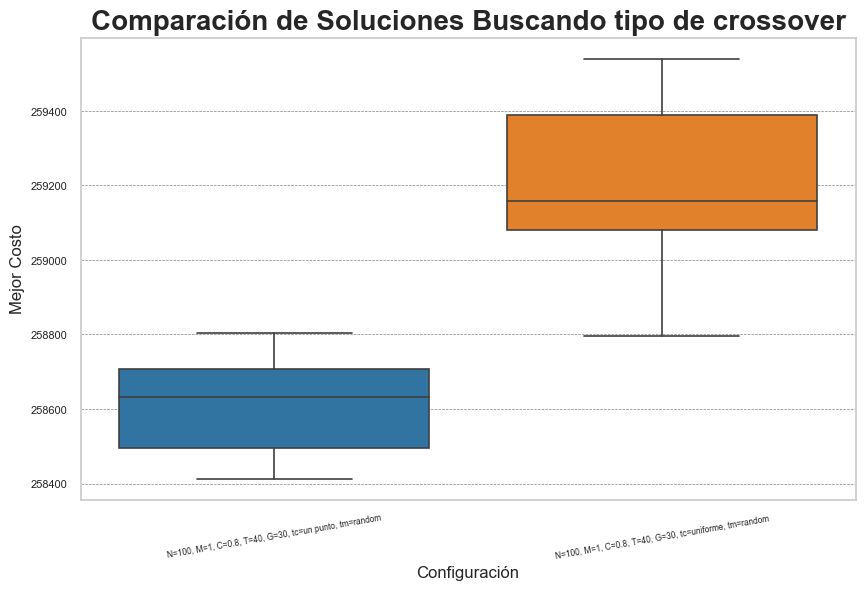

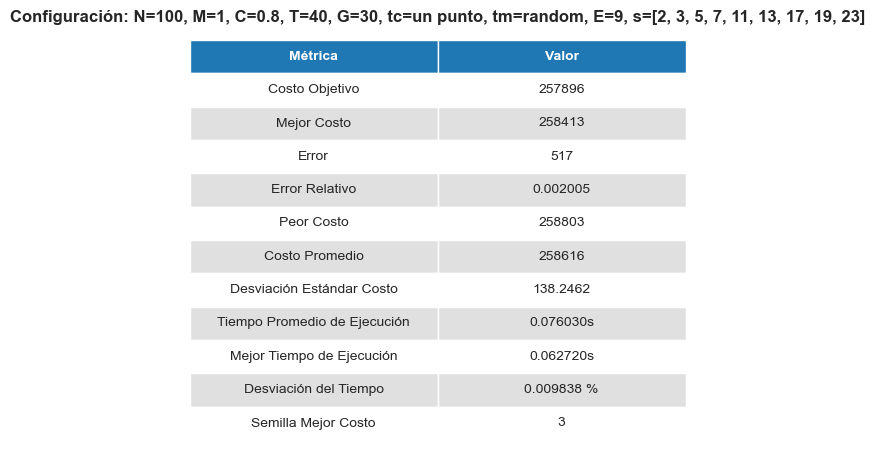

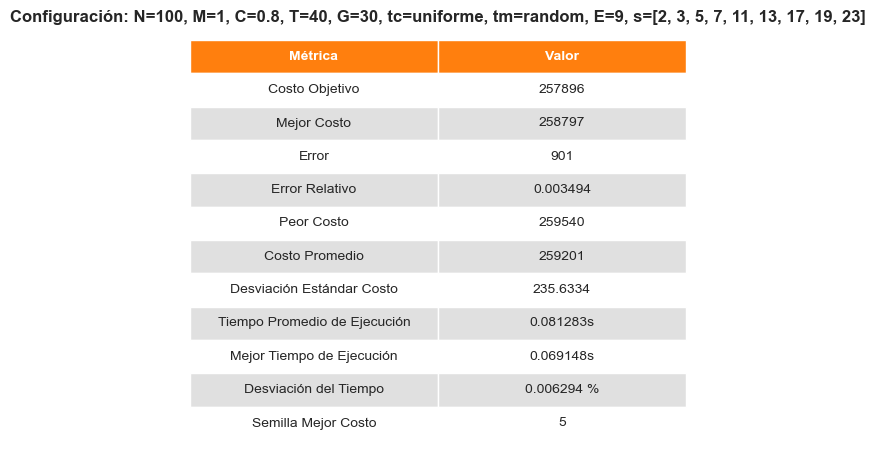

In [21]:
todo("Buscando tipo de crossover")

# **BÚSQUEDA DE TIPO DE MUTACIÓN**

In [22]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "mejor"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 258492, Tiempo = 0.16188s, Generación Óptima = None
Seed 3: Mejor Costo = 258146, Tiempo = 0.18864s, Generación Óptima = None
Seed 5: Mejor Costo = 258414, Tiempo = 0.16031s, Generación Óptima = None
Seed 7: Mejor Costo = 258356, Tiempo = 0.18476s, Generación Óptima = None
Seed 11: Mejor Costo = 258320, Tiempo = 0.17276s, Generación Óptima = None
Seed 13: Mejor Costo = 258206, Tiempo = 0.17881s, Generación Óptima = None
Seed 17: Mejor Costo = 258213, Tiempo = 0.16487s, Generación Óptima = None
Seed 19: Mejor Costo = 258516, Tiempo = 0.17847s, Generación Óptima = None
Seed 23: Mejor Costo = 258486, Tiempo = 0.16334s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random ---
Seed 2: Mejor Costo = 258695, Tiempo = 0.08884s, Generación Óptima = None
Seed 3: Mejor Costo = 258413, Tiempo = 0.07726s, Generación Óptima = None
Seed

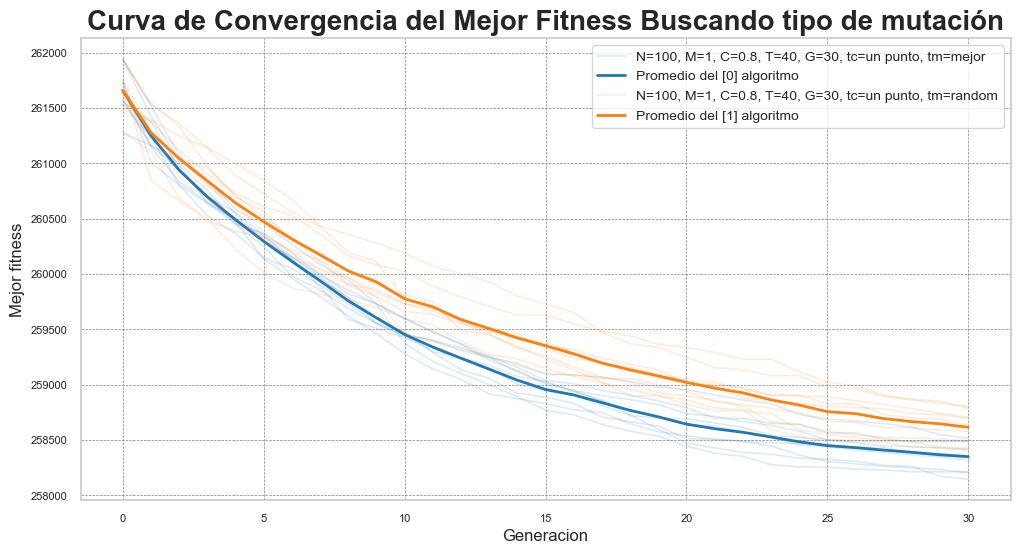

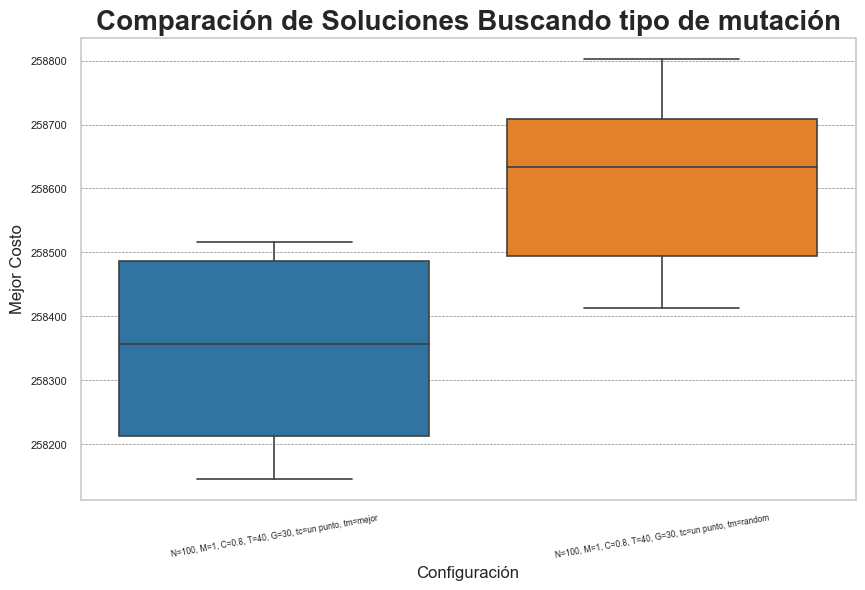

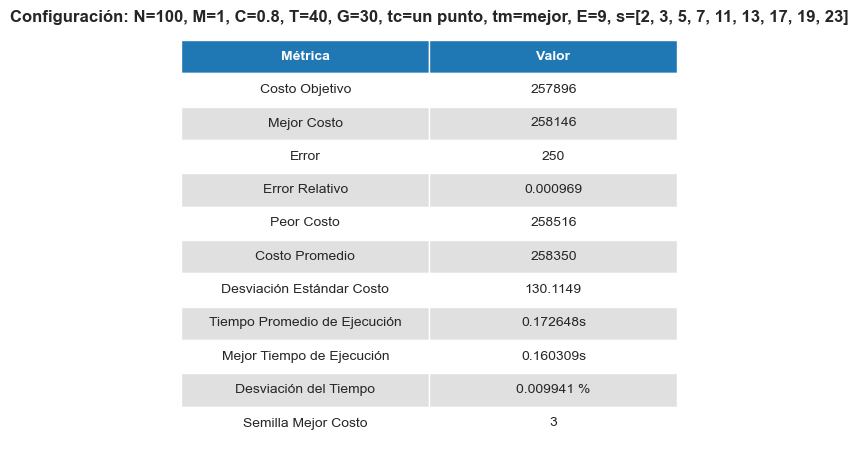

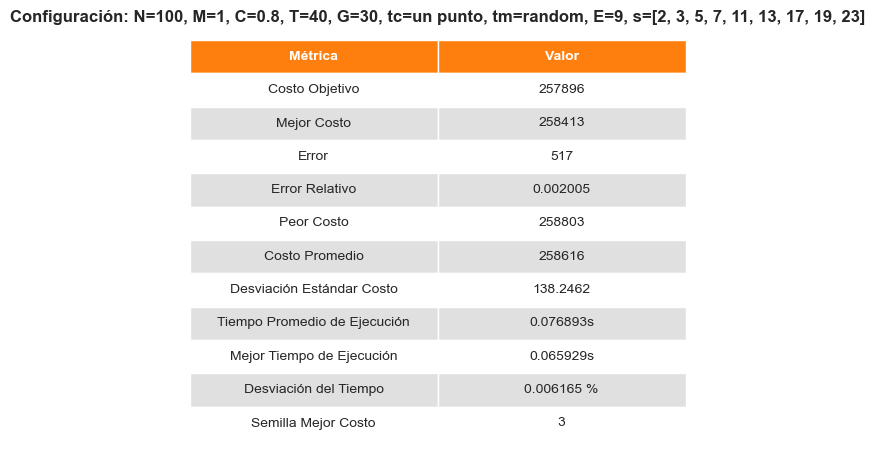

In [23]:
todo("Buscando tipo de mutación")